In [15]:
!cd ..

In [14]:
!pwd

/home/jaumaf/compartido/clases/tesis/jupyter


In [2]:
metafora1 = pd.read_csv("../resultados/metafora/c1.csv")

In [3]:
metonimia1 = pd.read_csv("../resultados/metonimia/c1.csv")

In [4]:
metonimia1.categoria

0                         reportage
1                         editorial
2                           reviews
3                          religion
4                  skills & hobbies
5                      popular lore
6                    belles lettres
7                     miscellaneous
8                           learned
9                   general fiction
10    mistery and detective fiction
11                  science fiction
12    adventure and western fiction
13           romance and love story
Name: categoria, dtype: object

In [5]:
total = pd.merge(metafora1, metonimia1, how='inner')

Cargo los resultados. Es decir, la palabras y la taza

In [6]:
total.columns

Index(['categoria', 'metafora', 'w', 'metonimia'], dtype='object')

In [7]:
total

,categoria,metafora,w,metonimia
0,reportage,8.805142e+05,2340,232.266917
1,editorial,8.803244e+05,2262,245.719532
2,reviews,9.298024e+05,2370,242.953762
3,religion,8.501277e+05,2314,264.683072
4,skills & hobbies,8.317817e+05,2232,242.632252
5,popular lore,8.338258e+05,2222,265.839881
6,belles lettres,8.776905e+05,2288,229.785870
7,miscellaneous,7.826133e+05,2214,278.192915
8,learned,8.632080e+05,2254,266.998264
9,general fiction,8.912116e+05,2264,249.950161


In [8]:
plt.rcParams.update({'figure.autolayout': True,'axes.titlepad':20 })

In [11]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
df.plot(ax=subplot)


<AxesSubplot:xlabel='w'>

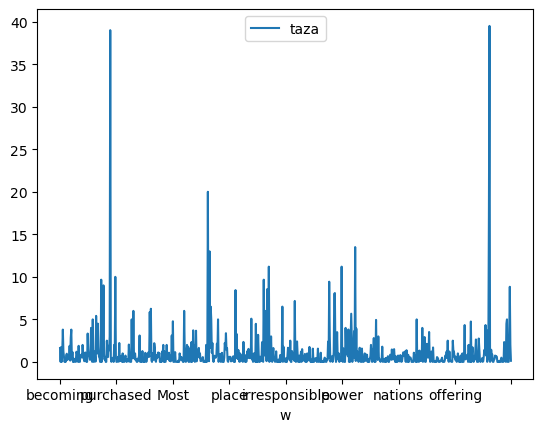

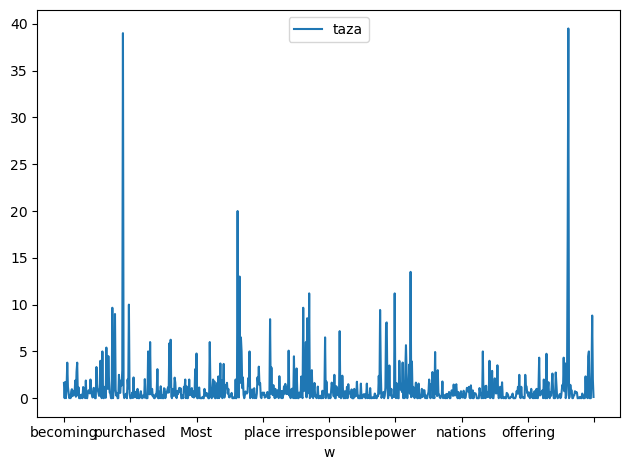

In [10]:
plt.show()

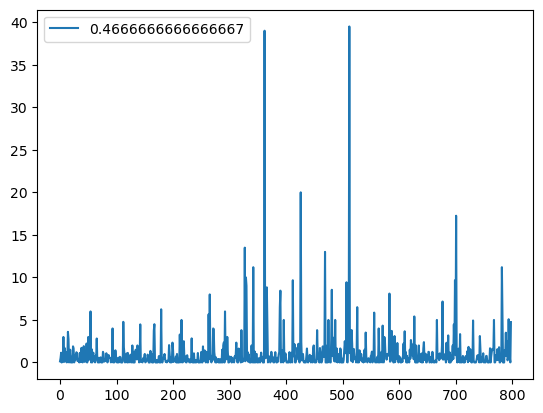

In [11]:
plt.show()

In [25]:
%matplotlib inline

In [31]:
subplot.set_xlabel("palabra")
subplot.set_ylabel("taza metafórica")

Text(4.444444444444445, 0.5, 'taza metafórica')

In [42]:

subplot.locator_params(nbins=50, axis='x')

In [52]:
df.plot(ax=subplot)

<AxesSubplot:xlabel='w', ylabel='taza metafórica'>

In [12]:
df

,taza
w,
becoming,1.636364
Technical,0.010000
Feelings,1.739130
Simultaneously,0.010000
modernize,1.250000
...,...
democratize,0.010000
inadequate,2.750000
category,8.833333


# Union de columnas

El ´backend´ produce salidas independientes para cada matriz. Para unirlas, es más fácil utilizar la API de Pandas. Ahora uniré mis tres matrices : la semántica, la de uso, y la de tazas o valores.

El paso 1 es cargarlas

In [31]:
semantica = pd.read_csv("matriz_semantica.csv", index_col=0)

In [32]:
uso = pd.read_csv("matriz_uso.csv", index_col=0)

In [33]:
valores = pd.read_csv("referencia_metaforica.csv", index_col=0)

In [34]:
valores

,taza
w,
becoming,1.636364
Technical,0.010000
Feelings,1.739130
Simultaneously,0.010000
modernize,1.250000
...,...
democratize,0.010000
inadequate,2.750000
category,8.833333


El paso dos es hacer un merge (se puede pensar como un ´JOIN´ de SQL)

In [23]:
result  =  pd.merge(semantica,  uso, on="w")

In [24]:
consolidado = pd.merge(result, valores, on="w")

Ahora tenemos un consolidado de nuestros datos obtenidos hasta ahora.

In [30]:
consolidado

,vector_semantico,vector_uso,taza
w,,,
becoming,"['becoming', 'comme_il_faut', 'comely', 'becom...","[1, 0, 0, 5, 0, 0, 0, 8, 2, 2, 0]",1.636364
Technical,"['technological', 'technical', 'technical_foul...","[0, 0, 0, 0, 0]",0.010000
Feelings,"['belief', 'sense', 'spirit', 'tactual_sensati...","[4, 4, 1, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1.739130
Simultaneously,"['at_the_same_time', 'simultaneously']","[0, 0]",0.010000
modernize,"['modernize', 'modernise', 'develop', 'overhaul']","[0, 0, 5, 0]",1.250000
...,...,...,...
democratize,"['democratise', 'democratize']","[0, 0]",0.010000
inadequate,"['inadequate', 'poor', 'short', 'unequal']","[1, 1, 9, 0]",2.750000
category,"['category', 'family', 'class']","[1, 17, 35]",8.833333


# Normalización

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()


Pasar los la matriz al Scaler puede ser molesto. Acepta matricez 2D. Así que la siguiente celda fallará:

In [39]:
scaler.fit(consolidado.taza)

ValueError: Expected 2D array, got 1D array instead:
array=[1.63636364e+00 1.00000000e-02 1.73913043e+00 1.00000000e-02
 1.25000000e+00 3.80000000e+00 1.22222222e+00 6.11111111e-01
 1.00000000e-02 2.22222222e-01 5.00000000e-03 7.50000000e-01
 9.66666667e-01 2.22222222e-01 3.33333333e-01 8.00000000e-01
 4.00000000e-01 1.88888889e+00 1.60714286e-01 2.81818182e+00
 3.80000000e+00 2.91666667e-01 1.16666667e+00 5.00000000e-04
 3.75000000e-01 1.66666667e-04 2.50000000e-01 3.90909091e-01
 5.00000000e-03 1.20000000e+00 1.00000000e+00 3.33333333e-01
 1.00000000e-02 1.89285714e+00 5.00000000e-02 2.00000000e-04
 6.00000000e-01 8.33333333e-01 8.50000000e-01 5.19230769e-01
 2.00000000e+00 1.00000000e+00 4.16666667e-01 8.33333333e-02
 1.66666667e-01 1.10714286e+00 1.25000000e-01 4.16666667e-05
 1.00000000e-02 3.33333333e+00 1.12500000e+00 8.57142857e-01
 6.00000000e-01 2.50000000e-01 1.50000000e+00 4.00000000e+00
 3.12500000e-01 1.00000000e-02 5.00000000e+00 4.66666667e-01
 2.00000000e-03 1.22222222e+00 1.00000000e+00 4.16666667e-02
 5.41176471e+00 1.60000000e+00 1.00000000e+00 4.50000000e+00
 1.83333333e+00 6.04651163e-01 5.00000000e-01 1.00000000e-02
 3.33333333e-03 9.66666667e+00 1.00000000e-02 7.21311475e-01
 2.00000000e+00 9.00000000e+00 9.37500000e-01 2.77777778e-01
 5.55555556e-01 1.00000000e-04 1.00000000e-02 2.50000000e+00
 6.66666667e-01 5.71428571e-01 1.88888889e+00 1.36363636e+00
 3.00000000e+00 3.90000000e+01 5.88235294e-01 1.00000000e-02
 2.58064516e-01 3.75000000e-01 5.00000000e-01 1.00000000e-03
 2.00000000e+00 1.06666667e+00 1.00000000e+01 5.55555556e-01
 1.00000000e-02 1.00000000e-02 1.11111111e-01 6.00000000e-01
 2.63157895e-02 2.22222222e+00 1.01190476e-01 6.96969697e-01
 1.19047619e-01 2.72727273e-01 1.00000000e-02 1.00000000e+00
 1.00000000e-02 5.00000000e-03 1.00000000e-02 4.66666667e-01
 7.50000000e-01 1.42857143e-01 5.00000000e-04 2.85714286e-01
 2.22222222e-01 5.88235294e-02 2.04166667e+00 3.33333333e-01
 1.00000000e-02 5.00000000e-03 1.00000000e-02 5.00000000e+00
 6.50000000e-01 4.23076923e-01 6.00000000e+00 9.42857143e-01
 4.00000000e-01 1.00000000e+00 2.00000000e-01 3.00000000e-01
 1.00000000e-02 1.00000000e-02 3.88888889e-01 1.66666667e-01
 8.00000000e-01 3.10714286e+00 1.00000000e-02 1.00000000e-03
 7.00000000e-01 1.00000000e-02 1.27586207e+00 1.11111111e-01
 5.00000000e-04 2.83333333e-01 1.00000000e-03 1.06896552e+00
 1.00000000e+00 1.00000000e-02 6.00000000e-01 5.33333333e-01
 8.88888889e-01 1.16666667e+00 6.00000000e-01 5.86363636e+00
 1.25000000e+00 6.25000000e+00 1.83333333e-01 1.00000000e-03
 1.00000000e+00 6.66666667e-01 2.50000000e-01 2.20000000e+00
 1.66666667e+00 2.50000000e-01 1.00000000e-02 7.80487805e-01
 4.28571429e-01 7.50000000e-01 1.11111111e+00 6.50000000e-01
 1.06060606e+00 1.00000000e-03 1.42857143e-03 3.33333333e-01
 1.00000000e-02 1.22222222e+00 1.00000000e+00 2.00000000e+00
 1.00000000e-02 1.25000000e+00 1.00000000e-02 1.00000000e-02
 4.44444444e-01 2.00000000e+00 3.52941176e-01 5.55555556e-01
 3.75000000e-01 1.08333333e+00 1.33333333e-01 7.27272727e-01
 6.81818182e-02 2.50000000e-01 3.10714286e+00 2.00000000e-01
 4.77777778e+00 1.00000000e-02 5.00000000e-04 2.00000000e-01
 1.14705882e+00 1.00000000e-02 5.00000000e-03 1.00000000e-02
 2.00000000e-03 1.42857143e-01 1.00000000e-02 5.00000000e-04
 1.00000000e+00 5.50000000e-01 2.50000000e-01 5.71428571e-01
 5.00000000e-01 1.25000000e-01 5.00000000e-04 2.00000000e-04
 6.00000000e+00 1.10000000e+00 2.27272727e-01 3.33333333e-04
 9.50000000e-01 2.00000000e+00 1.66666667e-01 1.80000000e+00
 1.00000000e-03 1.00000000e-02 3.00000000e-01 1.62500000e+00
 1.00000000e-02 2.33333333e+00 1.00000000e-02 8.33333333e-01
 3.71428571e+00 1.66666667e-01 1.91666667e+00 1.00000000e-02
 1.22222222e+00 3.66666667e+00 6.66666667e-02 7.14285714e-01
 1.40000000e+00 1.25000000e+00 1.64705882e+00 5.00000000e-01
 1.00000000e+00 1.11111111e-01 1.00000000e-01 2.50000000e-01
 2.77777778e-01 5.71428571e-01 1.00000000e-02 2.00000000e-03
 1.00000000e-02 1.33333333e-01 1.07526882e-05 2.00000000e+00
 6.66666667e-05 2.87500000e-01 2.00000000e+01 5.50000000e-01
 8.33333333e-02 1.30000000e+01 1.64285714e+00 6.50000000e+00
 5.00000000e+00 1.08000000e+00 2.22222222e+00 3.75000000e-01
 9.09090909e-05 3.33333333e-01 7.27272727e-01 6.15384615e-01
 5.00000000e-01 6.25000000e-01 2.14285714e+00 1.36666667e+00
 5.00000000e+00 1.00000000e-02 7.69230769e-01 1.53846154e-01
 9.47368421e-01 1.00000000e-02 2.72727273e-01 1.07142857e+00
 1.00000000e-02 5.55555556e-02 1.00000000e-02 5.00000000e-01
 2.22727273e+00 1.50000000e+00 3.37500000e+00 1.42857143e+00
 1.62500000e+00 1.11111111e-01 1.00000000e-02 5.45454545e-01
 6.04651163e-01 4.00000000e-01 6.00000000e-01 5.88235294e-02
 2.22222222e-01 3.18181818e-01 1.60000000e-01 6.66666667e-01
 1.00000000e-02 3.33333333e-01 1.00000000e-02 8.44444444e+00
 5.00000000e-01 3.28571429e+00 7.50000000e-01 3.33333333e-01
 1.40000000e+00 4.44444444e-01 1.00000000e-02 1.00000000e+00
 8.10810811e-02 3.63636364e-01 6.66666667e-01 8.75000000e-01
 1.00000000e-02 2.35294118e+00 7.00000000e-01 7.69230769e-01
 1.00000000e-02 7.66666667e-01 1.00000000e-02 4.00000000e-01
 1.27272727e+00 5.00000000e-01 1.53333333e+00 5.00000000e-01
 4.44444444e-01 1.24137931e+00 4.63414634e-01 5.08333333e+00
 2.85714286e-01 8.00000000e-01 1.00000000e-02 9.58333333e-01
 1.01470588e+00 1.00000000e+00 1.00000000e-02 4.47826087e+00
 1.00000000e-02 1.50000000e+00 9.34579439e-06 3.18181818e+00
 9.23076923e-01 5.00000000e-03 5.00000000e-03 6.07142857e-01
 3.15789474e-01 1.11111111e-01 2.31818182e+00 1.78571429e-01
 1.00000000e-02 9.66666667e+00 7.61904762e-01 1.50000000e+00
 2.28571429e+00 6.00000000e+00 9.37500000e-02 8.54545455e+00
 5.16666667e-01 1.15789474e+00 1.12000000e+01 1.00000000e-02
 4.54545455e-01 1.60000000e-01 3.00000000e+00 3.33333333e-01
 1.00000000e-02 7.50000000e-01 1.63157895e+00 2.10526316e-01
 3.33333333e-01 1.00000000e-02 2.07692308e-01 1.24444444e+00
 1.00000000e-02 1.00000000e-02 2.50000000e-01 1.00000000e-02
 2.85714286e-01 5.00000000e-04 8.00000000e-01 1.00000000e-02
 7.55102041e-01 6.25000000e-01 6.50000000e+00 1.00000000e-02
 1.77777778e+00 3.75000000e-01 4.56521739e-01 1.00000000e-02
 1.00000000e-02 4.00000000e-01 5.00000000e-03 7.14285714e-01
 1.66666667e+00 1.05882353e+00 8.75000000e-01 2.00000000e-01
 2.50000000e+00 1.00000000e-02 5.00000000e-04 1.27586207e+00
 9.64285714e-01 3.33333333e-01 9.00000000e-01 1.42857143e-01
 7.16666667e+00 1.99074074e-01 1.26582278e-05 2.50000000e-01
 2.40740741e+00 9.16666667e-01 5.00000000e-03 1.00000000e-02
 7.43902439e-01 2.50000000e-03 2.85714286e-01 1.21428571e+00
 1.00000000e-02 1.50000000e+00 5.00000000e-01 6.17647059e-01
 6.52777778e-01 9.87654321e-02 9.41176471e-01 1.00000000e-03
 5.00000000e-04 5.00000000e-04 1.00000000e+00 1.58730159e-01
 8.68421053e-01 2.50000000e-01 1.76190476e+00 4.44444444e-01
 1.00000000e-03 2.66666667e-01 2.50000000e-03 1.25000000e-04
 1.56250000e+00 1.00000000e-02 1.00000000e-02 1.38157895e-01
 4.21568627e-01 2.00000000e-01 4.28571429e-01 1.42857143e-04
 2.66666667e-01 1.56338028e+00 1.00000000e-02 3.18181818e-01
 1.50000000e-01 3.57142857e-05 1.08000000e+00 1.00000000e-02
 4.76190476e-05 6.25000000e-02 1.00000000e-02 1.42857143e-01
 1.00000000e-02 5.00000000e-01 8.33333333e-02 1.00000000e-02
 1.00000000e-02 3.33333333e-01 2.14285714e-01 2.38888889e+00
 5.00000000e-01 9.42857143e+00 3.00000000e+00 3.24675325e-02
 2.17948718e-01 2.00000000e-01 6.66666667e-01 1.66666667e-03
 2.50000000e-01 1.14285714e+00 8.00000000e+00 8.10000000e+00
 1.16666667e+00 5.00000000e-04 3.57142857e-01 3.50000000e+00
 6.00000000e-01 2.91666667e-01 1.00000000e+00 5.00000000e-03
 2.50000000e-01 2.50000000e-01 1.25000000e-01 1.12000000e+01
 5.87301587e-01 1.00000000e-02 1.60000000e+00 1.12500000e+00
 5.00000000e-03 5.00000000e-05 4.00000000e+00 1.72058824e+00
 9.16666667e-01 1.41666667e+00 6.66666667e-01 3.81250000e+00
 1.00000000e-02 1.60000000e+00 1.00000000e-02 2.63888889e+00
 5.66666667e+00 2.83333333e+00 5.00000000e-03 1.58333333e+00
 9.28571429e-01 3.60000000e+00 4.80000000e-01 1.35000000e+01
 1.07142857e-01 3.92307692e+00 2.22222222e-01 1.21428571e+00
 6.66666667e-01 1.00000000e-02 8.33333333e-01 1.66666667e+00
 3.57142857e-01 1.00000000e-02 1.33333333e-05 1.57142857e+00
 1.25000000e-01 1.00000000e-02 1.00000000e-02 3.91304348e-01
 1.00000000e+00 1.25000000e-01 2.50000000e-01 8.67647059e-01
 8.33333333e-01 1.00000000e-02 3.07692308e-01 1.00000000e-02
 5.00000000e-03 3.75000000e-01 6.66666667e-01 2.00000000e+00
 1.00000000e+00 1.00000000e-03 1.50000000e+00 1.13333333e+00
 2.80000000e+00 1.00000000e-02 1.81818182e-01 1.00000000e-02
 4.93750000e+00 4.54545455e-01 8.57142857e-01 2.32758621e-01
 3.00000000e+00 3.88888889e-01 3.95833333e-01 9.52380952e-02
 1.00000000e-02 2.00000000e-01 3.00000000e-01 1.79166667e+00
 1.00000000e-02 1.25000000e-01 3.33333333e-01 1.00000000e-02
 1.00000000e-02 4.61538462e-01 2.00000000e-03 4.61538462e-01
 1.50000000e-01 6.66666667e-01 3.33333333e-04 1.00000000e-02
 5.00000000e-01 8.46153846e-01 6.36363636e-01 2.50000000e-01
 1.46341463e+00 5.41666667e-01 2.85714286e-01 1.25000000e+00
 1.50000000e+00 4.28571429e-01 2.50000000e-04 6.66666667e-01
 1.00000000e-02 5.00000000e-04 1.00000000e-02 7.50000000e-01
 2.00000000e-01 2.50000000e-01 5.55555556e-02 8.00000000e-01
 5.00000000e-01 1.00000000e-02 7.69230769e-02 5.62500000e-01
 1.11111111e+00 1.02777778e+00 7.00000000e-01 1.21428571e+00
 8.33333333e-02 7.69230769e-05 1.37500000e+00 2.94117647e-01
 1.00000000e-02 8.33333333e-01 6.66666667e-05 5.41666667e-01
 5.00000000e-01 5.20833333e-01 3.33333333e-01 1.40845070e-05
 1.00000000e-02 3.33333333e-03 2.50000000e-04 1.08333333e+00
 6.00000000e-01 5.00000000e-01 1.00000000e-02 1.00000000e-02
 5.00000000e+00 1.00000000e-02 1.25000000e-01 1.25000000e+00
 1.00000000e-02 1.33333333e+00 1.11111111e-01 6.66666667e-01
 1.25000000e-01 5.55555556e-01 4.00000000e+00 1.00000000e-02
 1.22222222e-01 1.00000000e+00 2.92307692e+00 1.00000000e-02
 5.00000000e-03 7.81250000e-01 2.12500000e+00 8.50000000e-01
 5.00000000e-01 7.14285714e-01 3.51818182e+00 6.00000000e-01
 1.00000000e-03 2.42857143e-01 1.22222222e+00 1.20000000e+00
 5.00000000e-03 1.70000000e+00 2.00000000e-01 1.00000000e-02
 1.00000000e-02 1.25000000e-01 1.31578947e-05 3.33333333e-04
 5.66666667e-01 5.00000000e-01 3.57142857e-01 1.00000000e-02
 1.00000000e-02 5.00000000e-03 1.25000000e-01 1.25000000e-01
 3.33333333e-01 5.00000000e-01 1.00000000e-02 3.33333333e-04
 1.00000000e-02 1.00000000e-02 2.50000000e-01 7.69230769e-01
 5.00000000e-01 1.21428571e+00 5.00000000e-01 2.50000000e+00
 1.38461538e-01 1.00000000e-02 1.22222222e+00 1.25000000e-01
 7.40740741e-02 1.33333333e-01 1.00000000e-02 1.00000000e-02
 2.50000000e+00 1.33333333e+00 1.25000000e+00 5.23809524e-01
 6.42857143e-01 1.90476190e-01 6.00000000e-01 5.00000000e-03
 2.00000000e-01 1.00000000e+00 3.13131313e-01 1.00000000e-02
 4.70588235e-01 3.33333333e-04 7.50000000e-01 3.57142857e-02
 1.00000000e-02 1.00000000e+00 4.21052632e-02 5.00000000e-03
 1.15384615e+00 4.33333333e+00 3.00000000e-01 3.33333333e-01
 5.71428571e-01 6.92307692e-01 8.57142857e-01 1.00000000e-02
 2.00000000e+00 1.66666667e-01 1.00000000e-02 1.66666667e-04
 4.75000000e+00 5.00000000e-04 1.00000000e+00 1.71428571e+00
 2.66666667e-01 5.00000000e-03 6.66666667e-01 2.59259259e-01
 1.50000000e+00 2.63888889e+00 9.09090909e-01 1.00000000e-02
 1.00000000e-02 1.00000000e-02 2.75000000e+00 1.50000000e+00
 2.35294118e-01 1.00000000e-03 1.33333333e-01 1.66666667e-01
 4.44444444e-01 1.00000000e-02 1.00000000e-01 8.00000000e-01
 1.42857143e+00 1.10000000e+00 4.33333333e+00 7.50000000e-01
 3.73333333e+00 1.00000000e-02 3.33333333e-01 1.57142857e+00
 1.72500000e+01 3.95000000e+01 5.00000000e-03 1.42857143e-01
 1.43333333e+00 7.77777778e-01 8.57142857e-01 1.00000000e-02
 1.00000000e-02 2.85714286e-01 3.24675325e-01 7.50000000e-01
 5.83333333e-01 6.66666667e-01 6.13122172e-01 1.66666667e-03
 1.00000000e-03 7.69230769e-02 3.33333333e-03 1.42857143e-01
 1.00000000e-02 1.00000000e-02 5.00000000e-01 3.04347826e-01
 2.00000000e-04 1.00000000e-02 1.85185185e-02 2.33333333e+00
 4.16666667e-01 3.33333333e-01 1.00000000e-02 4.47058824e+00
 5.00000000e+00 1.00000000e-02 1.00000000e-02 1.00000000e-02
 2.75000000e+00 8.83333333e+00 2.00000000e+00 1.33333333e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Mientras que esta funcionará

In [42]:
scaler.fit(consolidado[["taza"]])

StandardScaler()

Por alguna razón es necesaria evaluar este atributo antes de hacer el ´transform´

In [43]:
scaler.mean_

array([1.0850108])

In [44]:
res_standard_scaler = pd.DataFrame(scaler.transform(consolidado[['taza']]), columns=["min_max"], index=consolidado.index)

In [45]:
res_standard_scaler

,min_max
w,
becoming,0.205440
Technical,-0.400561
Feelings,0.243732
Simultaneously,-0.400561
modernize,0.061477
...,...
democratize,-0.400561
inadequate,0.620393
category,2.887108


Agrego la columna z a mi consolidado anterior

In [48]:
consolidado["z"] = res_standard_scaler["min_max"]

In [49]:
consolidado

,vector_semantico,vector_uso,taza,z
w,,,,
becoming,"['becoming', 'comme_il_faut', 'comely', 'becom...","[1, 0, 0, 5, 0, 0, 0, 8, 2, 2, 0]",1.636364,0.205440
Technical,"['technological', 'technical', 'technical_foul...","[0, 0, 0, 0, 0]",0.010000,-0.400561
Feelings,"['belief', 'sense', 'spirit', 'tactual_sensati...","[4, 4, 1, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1.739130,0.243732
Simultaneously,"['at_the_same_time', 'simultaneously']","[0, 0]",0.010000,-0.400561
modernize,"['modernize', 'modernise', 'develop', 'overhaul']","[0, 0, 5, 0]",1.250000,0.061477
...,...,...,...,...
democratize,"['democratise', 'democratize']","[0, 0]",0.010000,-0.400561
inadequate,"['inadequate', 'poor', 'short', 'unequal']","[1, 1, 9, 0]",2.750000,0.620393
category,"['category', 'family', 'class']","[1, 17, 35]",8.833333,2.887108


In [50]:
consolidado.plot()

<AxesSubplot:xlabel='w'>

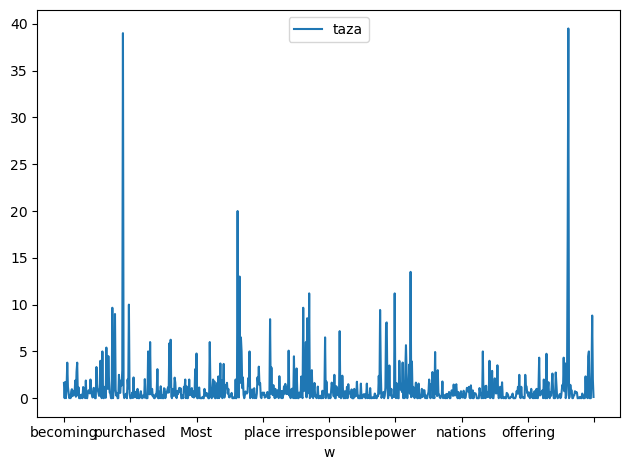

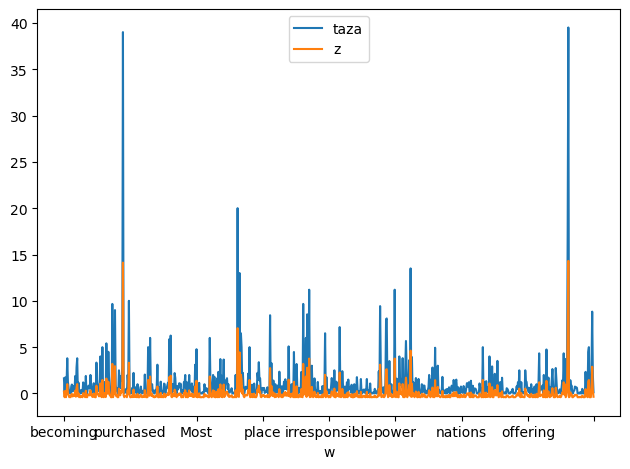

In [51]:
plt.show()

In [52]:

min_max_scaler = preprocessing.MinMaxScaler()

In [53]:
res_min_max_scaler = pd.DataFrame(min_max_scaler.fit_transform(consolidado[['taza']]), columns=["min_max"], index=consolidado.index)

In [58]:
consolidado["min_max"] = res_min_max_scaler["min_max"]

In [59]:
consolidado

,vector_semantico,vector_uso,taza,z,min_max
w,,,,,
becoming,"['becoming', 'comme_il_faut', 'comely', 'becom...","[1, 0, 0, 5, 0, 0, 0, 8, 2, 2, 0]",1.636364,0.205440,0.041427
Technical,"['technological', 'technical', 'technical_foul...","[0, 0, 0, 0, 0]",0.010000,-0.400561,0.000253
Feelings,"['belief', 'sense', 'spirit', 'tactual_sensati...","[4, 4, 1, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1.739130,0.243732,0.044028
Simultaneously,"['at_the_same_time', 'simultaneously']","[0, 0]",0.010000,-0.400561,0.000253
modernize,"['modernize', 'modernise', 'develop', 'overhaul']","[0, 0, 5, 0]",1.250000,0.061477,0.031645
...,...,...,...,...,...
democratize,"['democratise', 'democratize']","[0, 0]",0.010000,-0.400561,0.000253
inadequate,"['inadequate', 'poor', 'short', 'unequal']","[1, 1, 9, 0]",2.750000,0.620393,0.069620
category,"['category', 'family', 'class']","[1, 17, 35]",8.833333,2.887108,0.223629


In [60]:
consolidado.plot()

<AxesSubplot:xlabel='w'>

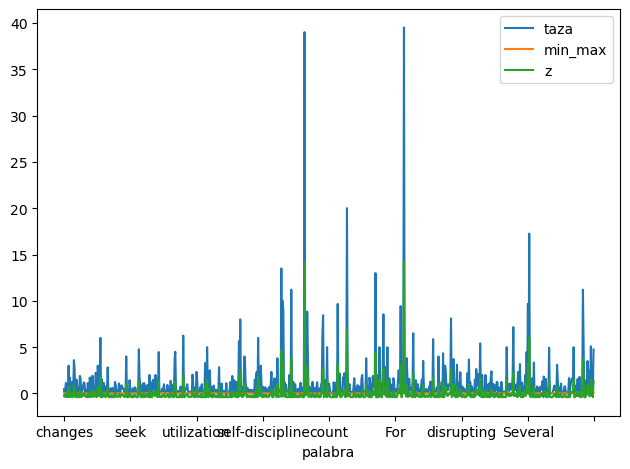

In [110]:
plt.show()

In [111]:
consolidado.plot(ylim=(-40,50))

<AxesSubplot:xlabel='palabra'>

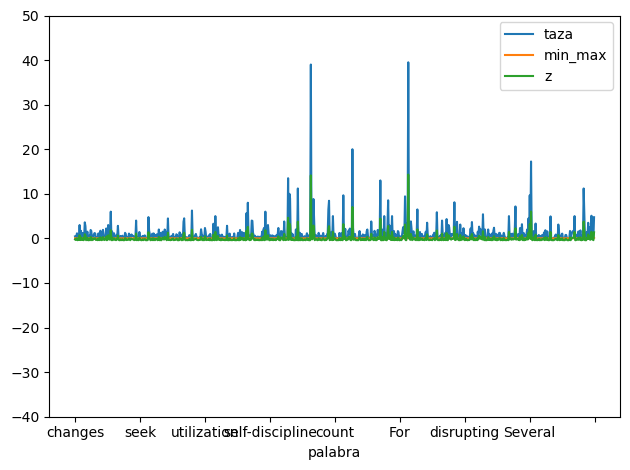

In [112]:
plt.show()

Nota: El algoritmo de taza que estabas usando antes parece mejor candidato

AttributeError: 'MinMaxScaler' object has no attribute 'mean'